<a href="https://colab.research.google.com/github/juli-ter/Course3_work/blob/main/LDA%2BTone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 8.2 MB 11.4 MB/s 


In [7]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
import pymorphy2
import re
import string
from tqdm import tqdm
from collections import Counter
import numpy as np

from gensim import corpora
from datetime import datetime

tqdm.pandas()
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

from multiprocessing import Pool
morph = pymorphy2.MorphAnalyzer()

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
%%capture
!pip install twarc #Twarc
!pip install tweepy # Tweepy 3.8.0
!pip install argparse #Argparse 3.2
!pip install xtract #Xtract 0.1 a3
!pip install wget #Wget 3.2


In [6]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
path = "/content/drive/MyDrive/Course_3/"


### Словарь

In [10]:
from ast import literal_eval


In [11]:
ru = pd.read_csv('/content/drive/MyDrive/Course_3/clean_texts_ru.csv',  lineterminator='\n')
ru['text'] = ru['text'].apply(literal_eval)
ru

,text,date,raw_text,lang
0,"[помнить, ухань, мужчина, короновирус, масло, ...",Wed Apr 22 12:50:58 +0000 2020,А помните в Ухане мужчина с короновирусом в ра...,ru
1,"[выходить, выкинуть, мусор, сосед, напротив, в...",Wed Apr 15 18:30:08 +0000 2020,"выходила выкинуть мусор под домом, а дед-сосед...",ru
2,"[бесить, слово, коронавирус, появление, жизнь]",Tue May 05 09:08:05 +0000 2020,"Меня бесит слово ""коронавирус"" уже с самого ег...",ru
3,"[коммент, обсуждение, раскупать, магазин, врем...",Tue Mar 17 09:06:58 +0000 2020,топ коммент обсуждения что раскупают в магазин...,ru
4,"[действительно, делаться, очень, многое, прода...",Fri Mar 27 18:18:40 +0000 2020,"@dima_29ss @sd100674 Действительно, делается о...",ru
...,...,...,...,...
138960,"[грузия, рассчитывать, белорусский, турист, сп...",Thu May 21 09:21:21 +0000 2020,Грузия рассчитывает на белорусских туристов по...,ru
138961,"[никто, сломать, таджик, носитель, корона]",Sun Mar 08 08:00:31 +0000 2020,"@jksbabyboo Нас никогда никто не сломает, мы-т...",ru
138962,"[россия, нормально, долбоеб, принимать, решение]",Wed Apr 15 10:25:34 +0000 2020,"Так в России, это нормально, когда долбоебы пр...",ru
138963,"[коротко, ситуация, короновирус, город, массов...",Sun Mar 15 17:09:07 +0000 2020,Коротко о ситуации с короновирусом в моем горо...,ru


In [12]:
en = pd.read_csv('/content/drive/MyDrive/Course_3/clean_texts_en.csv',  lineterminator='\n')
en['text'] = en['text'].apply(literal_eval)
en

,text,date,raw_text
0,"[asks, life, back, normal, coronavirus]",Mon May 11 17:13:00 +0000 2020,umair haque asks if life will go back to norma...
1,"[cities, lockdown, amid, covid, scare, scenes,...",Mon Mar 23 08:49:20 +0000 2020,Cities under lockdown amid Covid-19 scare: Sce...
2,"[covid, conservative, need, self, test]",Mon May 25 18:05:05 +0000 2020,#SackBorisAndDom #COVID19 #Conservative #KierS...
3,"[governor, kemp, wont, open, georgia, restaura...",Fri Apr 24 17:21:24 +0000 2020,"No, Governor Kemp, I won’t open my Georgia res..."
4,"[wisconsin, coronavirus, cases, rise, nearly, ...",Sun May 31 00:17:34 +0000 2020,Wisconsin coronavirus cases rise by nearly 20 ...
...,...,...,...
128561,"[health, covid, enforcement, statistics, infor...",Fri Apr 17 14:50:26 +0000 2020,(Health) COVID-19 enforcement statistics infor...
128562,"[coronavirus, confirmed, cases, double, china,...",Tue Mar 31 16:37:19 +0000 2020,"""Coronavirus: US confirmed cases now double th..."
128563,"[aide, night, volunteer, lucky, worked]",Thu May 07 15:27:58 +0000 2020,Day Job: Cory Booker’s Top Aide. His Night One...
128564,"[remember, care, voters, care]",Sun Apr 12 23:42:11 +0000 2020,Remember: F*CK @speakvos @SenFitzgerald @mkego...


In [158]:
dictionary_ru = corpora.Dictionary(ru.text)
dictionary_en = corpora.Dictionary(en.text)

dictionary_ru.filter_extremes(no_below = 10, no_above = 0.65, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary_en.filter_extremes(no_below = 10, no_above = 0.65, keep_n=None)

dictionary_ru.save('lda_ru.dict')
dictionary_en.save('lda_en.dict')

In [50]:
corpus_ru = [dictionary_ru.doc2bow(text) for text in ru.text]
print(corpus_ru[:1])
# corpora.MmCorpus.serialize('lda_gensim.model', corpus_ru)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [159]:
corpus_en = [dictionary_en.doc2bow(text) for text in en.text]


In [23]:
%%capture

!pip install optuna


In [24]:
import optuna

In [ ]:
params = {
    'num_topics': [15, 20, 25, 30, 35],
    'iterations': [5, 10, 15, 20, 25, 50],
    'passes': [1, 3, 5, 10, 15, 20, 25],
    'gamma_threshold': [0.0001, 0.001, 0.01, 0.1],
}

###LDA

#### Английский

In [57]:
def objective(trial):
    alpha = trial.suggest_uniform("alpha", 0.01, 1)
    eta = trial.suggest_uniform("eta", 0.01, 1)
    ntopics = trial.suggest_int("num_topics", 7, 35)

    ideal_score = 0.8
    model = LdaMulticore(
        workers=7,
        corpus=corpus_en,
        id2word=dictionary_en,
        num_topics=ntopics,
        random_state=10,
        passes=3,
        alpha=alpha,
        eta=eta,
        per_word_topics=True,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=en.text, dictionary=dictionary_en).get_coherence()
    print(f"Trial {trial.number} coherence score: {round(sc,3)}")
    return sc

In [58]:

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-10-04 17:58:03,563] A new study created in memory with name: no-name-2fcffdf5-5ed5-4763-8c7c-b42b2181b2cd
[I 2021-10-04 17:58:47,251] Trial 0 finished with value: 0.3940287676891494 and parameters: {'alpha': 0.6008673179868854, 'eta': 0.4387406026766941, 'num_topics': 13}. Best is trial 0 with value: 0.3940287676891494.


Trial 0 coherence score: 0.394


[I 2021-10-04 17:59:32,034] Trial 1 finished with value: 0.34603317991395643 and parameters: {'alpha': 0.5053547409209893, 'eta': 0.7040500343164198, 'num_topics': 35}. Best is trial 0 with value: 0.3940287676891494.


Trial 1 coherence score: 0.346


[I 2021-10-04 18:00:15,550] Trial 2 finished with value: 0.3429654704589278 and parameters: {'alpha': 0.9069197514076242, 'eta': 0.23304134627619777, 'num_topics': 23}. Best is trial 0 with value: 0.3940287676891494.


Trial 2 coherence score: 0.343


[I 2021-10-04 18:00:59,213] Trial 3 finished with value: 0.40323886558918254 and parameters: {'alpha': 0.5394445357122674, 'eta': 0.9033197788767099, 'num_topics': 16}. Best is trial 3 with value: 0.40323886558918254.


Trial 3 coherence score: 0.403


[I 2021-10-04 18:01:43,995] Trial 4 finished with value: 0.3348210653523461 and parameters: {'alpha': 0.7526300865687281, 'eta': 0.6455293847801495, 'num_topics': 35}. Best is trial 3 with value: 0.40323886558918254.


Trial 4 coherence score: 0.335


[I 2021-10-04 18:02:28,438] Trial 5 finished with value: 0.3404733786658585 and parameters: {'alpha': 0.5262564148867741, 'eta': 0.7505516371060139, 'num_topics': 32}. Best is trial 3 with value: 0.40323886558918254.


Trial 5 coherence score: 0.34


[I 2021-10-04 18:03:20,078] Trial 6 finished with value: 0.3867802055413139 and parameters: {'alpha': 0.7653139789782512, 'eta': 0.017474032257838473, 'num_topics': 10}. Best is trial 3 with value: 0.40323886558918254.


Trial 6 coherence score: 0.387


[I 2021-10-04 18:04:07,522] Trial 7 finished with value: 0.36310629128057614 and parameters: {'alpha': 0.1798475524998558, 'eta': 0.15648396820098814, 'num_topics': 22}. Best is trial 3 with value: 0.40323886558918254.


Trial 7 coherence score: 0.363


[I 2021-10-04 18:04:51,230] Trial 8 finished with value: 0.33752884427762614 and parameters: {'alpha': 0.9535629754758479, 'eta': 0.21652857452282637, 'num_topics': 23}. Best is trial 3 with value: 0.40323886558918254.


Trial 8 coherence score: 0.338


[I 2021-10-04 18:05:35,494] Trial 9 finished with value: 0.3332591253007412 and parameters: {'alpha': 0.5727865136705769, 'eta': 0.8338849753164809, 'num_topics': 29}. Best is trial 3 with value: 0.40323886558918254.


Trial 9 coherence score: 0.333


[I 2021-10-04 18:06:19,913] Trial 10 finished with value: 0.366132383385948 and parameters: {'alpha': 0.24044560267556914, 'eta': 0.9729649011433602, 'num_topics': 15}. Best is trial 3 with value: 0.40323886558918254.


Trial 10 coherence score: 0.366


[I 2021-10-04 18:07:06,323] Trial 11 finished with value: 0.36143624556918036 and parameters: {'alpha': 0.33898921196057635, 'eta': 0.45876937465121853, 'num_topics': 14}. Best is trial 3 with value: 0.40323886558918254.


Trial 11 coherence score: 0.361


[I 2021-10-04 18:07:50,173] Trial 12 finished with value: 0.39537837599394976 and parameters: {'alpha': 0.6675894038548232, 'eta': 0.40694966080802625, 'num_topics': 7}. Best is trial 3 with value: 0.40323886558918254.


Trial 12 coherence score: 0.395


[I 2021-10-04 18:08:38,083] Trial 13 finished with value: 0.39210926097101406 and parameters: {'alpha': 0.3751293020584673, 'eta': 0.5438964104480344, 'num_topics': 8}. Best is trial 3 with value: 0.40323886558918254.


Trial 13 coherence score: 0.392


[I 2021-10-04 18:09:20,849] Trial 14 finished with value: 0.3444660110392359 and parameters: {'alpha': 0.6962460613861379, 'eta': 0.9961195631007114, 'num_topics': 18}. Best is trial 3 with value: 0.40323886558918254.


Trial 14 coherence score: 0.344


[I 2021-10-04 18:10:04,865] Trial 15 finished with value: 0.43922224810711136 and parameters: {'alpha': 0.0749542869548156, 'eta': 0.3823825510222242, 'num_topics': 7}. Best is trial 15 with value: 0.43922224810711136.


Trial 15 coherence score: 0.439


[I 2021-10-04 18:10:49,435] Trial 16 finished with value: 0.42003595783295 and parameters: {'alpha': 0.017556281345467176, 'eta': 0.29116056176922395, 'num_topics': 18}. Best is trial 15 with value: 0.43922224810711136.


Trial 16 coherence score: 0.42


[I 2021-10-04 18:11:36,759] Trial 17 finished with value: 0.41188842764194944 and parameters: {'alpha': 0.011516856321192318, 'eta': 0.3198523595128444, 'num_topics': 26}. Best is trial 15 with value: 0.43922224810711136.


Trial 17 coherence score: 0.412


[I 2021-10-04 18:12:19,413] Trial 18 finished with value: 0.4179973961185885 and parameters: {'alpha': 0.018295718600473045, 'eta': 0.5764720672192961, 'num_topics': 11}. Best is trial 15 with value: 0.43922224810711136.


Trial 18 coherence score: 0.418


[I 2021-10-04 18:13:07,610] Trial 19 finished with value: 0.3756292454188465 and parameters: {'alpha': 0.12408036028396739, 'eta': 0.07707955964634822, 'num_topics': 19}. Best is trial 15 with value: 0.43922224810711136.


Trial 19 coherence score: 0.376
Accuracy: 0.43922224810711136
Best hyperparameters: {'alpha': 0.0749542869548156, 'eta': 0.3823825510222242, 'num_topics': 7}


In [64]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 0.005, 1)
    eta = trial.suggest_float("eta", 0.005, 1)
    ntopics = trial.suggest_int("num_topics", 7, 35)
    gamma  = trial.suggest_float("gamma", 0.001, 1)
    passes = trial.suggest_int("passes", 1, 7)
    model = LdaMulticore(
        workers=7,
        corpus=corpus_en,
        id2word=dictionary_en,
        num_topics=ntopics,
        random_state=42,
        passes=passes,
        alpha=alpha,
        eta=eta,
        per_word_topics=True,
        gamma_threshold = gamma,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=en.text, dictionary=dictionary_en).get_coherence()
    print(f"Trial {trial.number} coherence score: {round(sc,3)}")
    return sc

In [65]:

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
trial_en = study.best_trial

print('Accuracy: {}'.format(trial_en.value))
print("Best hyperparameters: {}".format(trial_en.params))

[I 2021-10-04 19:40:59,574] A new study created in memory with name: no-name-e18af83a-c3b8-4e62-81bb-431ee283a861
[I 2021-10-04 19:42:15,437] Trial 0 finished with value: 0.3389378753827992 and parameters: {'alpha': 0.5365101699557979, 'eta': 0.7356914683706055, 'num_topics': 33, 'gamma': 0.5158498557308823, 'passes': 7}. Best is trial 0 with value: 0.3389378753827992.


Trial 0 coherence score: 0.339


[I 2021-10-04 19:43:24,258] Trial 1 finished with value: 0.3773550286860533 and parameters: {'alpha': 0.008020382067343644, 'eta': 0.46763873704787984, 'num_topics': 25, 'gamma': 0.26172704637252225, 'passes': 5}. Best is trial 1 with value: 0.3773550286860533.


Trial 1 coherence score: 0.377


[I 2021-10-04 19:43:43,319] Trial 2 finished with value: 0.37183900583163637 and parameters: {'alpha': 0.08616825986387527, 'eta': 0.3140379792966448, 'num_topics': 29, 'gamma': 0.367462469005158, 'passes': 1}. Best is trial 1 with value: 0.3773550286860533.


Trial 2 coherence score: 0.372


[I 2021-10-04 19:44:02,002] Trial 3 finished with value: 0.35667659509628385 and parameters: {'alpha': 0.2052246474587477, 'eta': 0.45741033946608906, 'num_topics': 26, 'gamma': 0.3029458446152288, 'passes': 1}. Best is trial 1 with value: 0.3773550286860533.


Trial 3 coherence score: 0.357


[I 2021-10-04 19:45:01,972] Trial 4 finished with value: 0.38723080246548336 and parameters: {'alpha': 0.2744117951498993, 'eta': 0.09210023171094138, 'num_topics': 8, 'gamma': 0.9613791212044992, 'passes': 6}. Best is trial 4 with value: 0.38723080246548336.


Trial 4 coherence score: 0.387


[I 2021-10-04 19:46:16,638] Trial 5 finished with value: 0.3611072030658425 and parameters: {'alpha': 0.8365521326036722, 'eta': 0.0236569261113125, 'num_topics': 26, 'gamma': 0.3269343174057486, 'passes': 7}. Best is trial 4 with value: 0.38723080246548336.


Trial 5 coherence score: 0.361


[I 2021-10-04 19:47:25,836] Trial 6 finished with value: 0.40704356423456095 and parameters: {'alpha': 0.5938982813050159, 'eta': 0.9996402974983896, 'num_topics': 10, 'gamma': 0.5201152649008021, 'passes': 7}. Best is trial 6 with value: 0.40704356423456095.


Trial 6 coherence score: 0.407


[I 2021-10-04 19:48:55,296] Trial 7 finished with value: 0.4020675276180698 and parameters: {'alpha': 0.19351269741266272, 'eta': 0.5113616282752548, 'num_topics': 11, 'gamma': 0.031795530033782334, 'passes': 7}. Best is trial 6 with value: 0.40704356423456095.


Trial 7 coherence score: 0.402


[I 2021-10-04 19:49:51,180] Trial 8 finished with value: 0.3625441200219924 and parameters: {'alpha': 0.6678479588843819, 'eta': 0.0353868617839956, 'num_topics': 25, 'gamma': 0.1361295983729758, 'passes': 4}. Best is trial 6 with value: 0.40704356423456095.


Trial 8 coherence score: 0.363


[I 2021-10-04 19:50:48,405] Trial 9 finished with value: 0.3794502097794735 and parameters: {'alpha': 0.41972999270115185, 'eta': 0.017760725788796297, 'num_topics': 31, 'gamma': 0.3067954143776506, 'passes': 4}. Best is trial 6 with value: 0.40704356423456095.


Trial 9 coherence score: 0.379


[I 2021-10-04 19:51:21,422] Trial 10 finished with value: 0.35209039648755025 and parameters: {'alpha': 0.9759620109990634, 'eta': 0.9897980076589581, 'num_topics': 16, 'gamma': 0.672330787644023, 'passes': 3}. Best is trial 6 with value: 0.40704356423456095.


Trial 10 coherence score: 0.352


[I 2021-10-04 19:52:37,734] Trial 11 finished with value: 0.4542059689418728 and parameters: {'alpha': 0.4695168811026813, 'eta': 0.9691433042556818, 'num_topics': 8, 'gamma': 0.03447300650078983, 'passes': 6}. Best is trial 11 with value: 0.4542059689418728.


Trial 11 coherence score: 0.454


[I 2021-10-04 19:53:38,777] Trial 12 finished with value: 0.35099026710732345 and parameters: {'alpha': 0.6011331775592982, 'eta': 0.9700175485548347, 'num_topics': 15, 'gamma': 0.6523514999655156, 'passes': 6}. Best is trial 11 with value: 0.4542059689418728.


Trial 12 coherence score: 0.351


[I 2021-10-04 19:54:50,044] Trial 13 finished with value: 0.4676430523332899 and parameters: {'alpha': 0.39800022186318756, 'eta': 0.8165236473951121, 'num_topics': 7, 'gamma': 0.5545036296180837, 'passes': 6}. Best is trial 13 with value: 0.4676430523332899.


Trial 13 coherence score: 0.468


[I 2021-10-04 19:55:42,802] Trial 14 finished with value: 0.3842630083450612 and parameters: {'alpha': 0.3661693423981833, 'eta': 0.7954960316055943, 'num_topics': 16, 'gamma': 0.8443716223321578, 'passes': 5}. Best is trial 13 with value: 0.4676430523332899.


Trial 14 coherence score: 0.384


[I 2021-10-04 19:56:33,229] Trial 15 finished with value: 0.36933814291518735 and parameters: {'alpha': 0.7269500754807637, 'eta': 0.769320258441877, 'num_topics': 7, 'gamma': 0.7250134242235737, 'passes': 5}. Best is trial 13 with value: 0.4676430523332899.


Trial 15 coherence score: 0.369


[I 2021-10-04 19:57:18,668] Trial 16 finished with value: 0.38990856746454244 and parameters: {'alpha': 0.43493889026920335, 'eta': 0.6777243443793992, 'num_topics': 13, 'gamma': 0.0019080652695520478, 'passes': 3}. Best is trial 13 with value: 0.4676430523332899.


Trial 16 coherence score: 0.39


[I 2021-10-04 19:58:37,090] Trial 17 finished with value: 0.507199502609615 and parameters: {'alpha': 0.3086397815311668, 'eta': 0.8768887391044917, 'num_topics': 18, 'gamma': 0.4511552336882485, 'passes': 6}. Best is trial 17 with value: 0.507199502609615.


Trial 17 coherence score: 0.507


[I 2021-10-04 19:59:56,586] Trial 18 finished with value: 0.500223393643582 and parameters: {'alpha': 0.2962214118006601, 'eta': 0.8641642014705824, 'num_topics': 20, 'gamma': 0.43121095737591325, 'passes': 6}. Best is trial 17 with value: 0.507199502609615.


Trial 18 coherence score: 0.5


[I 2021-10-04 20:00:39,416] Trial 19 finished with value: 0.38084467316300186 and parameters: {'alpha': 0.27357509681586845, 'eta': 0.5845540995976765, 'num_topics': 20, 'gamma': 0.4151423069092792, 'passes': 3}. Best is trial 17 with value: 0.507199502609615.


Trial 19 coherence score: 0.381
Accuracy: 0.507199502609615
Best hyperparameters: {'alpha': 0.3086397815311668, 'eta': 0.8768887391044917, 'num_topics': 18, 'gamma': 0.4511552336882485, 'passes': 6}


In [84]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 0.005, 1)
    eta = trial.suggest_float("eta", 0.005, 1)
    ntopics = trial.suggest_int("num_topics", 7, 35)
    gamma  = trial.suggest_float("gamma", 0.001, 1)
    passes = trial.suggest_int("passes", 1, 7)
    model = LdaMulticore(
        workers=7,
        corpus=corpus_en,
        id2word=dictionary_en,
        num_topics=ntopics,
        random_state=42,
        passes=passes,
        alpha=alpha,
        eta=eta,
        per_word_topics=True,
        gamma_threshold = gamma,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=en.text, dictionary=dictionary_en).get_coherence()
    p = model.log_perplexity(corpus_en)
    print(f"Trial {trial.number} coherence score: {round(sc,3)}, Perplexity: {round(p,3)}")

    return sc

In [85]:

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
trial_en = study.best_trial

print('Accuracy: {}'.format(trial_en.value))
print("Best hyperparameters: {}".format(trial_en.params))

[I 2021-10-05 14:06:30,877] A new study created in memory with name: no-name-8fc5fe09-c7ee-4ebb-9b86-aa3cfaf25538
[I 2021-10-05 14:07:19,424] Trial 0 finished with value: 0.4606661872203819 and parameters: {'alpha': 0.3442150230642611, 'eta': 0.884866372313017, 'num_topics': 15, 'gamma': 0.2707503708850706, 'passes': 2}. Best is trial 0 with value: 0.4606661872203819.


Trial 0 coherence score: 0.461, Perplexity: -4.737


[I 2021-10-05 14:08:22,990] Trial 1 finished with value: 0.48464980572726396 and parameters: {'alpha': 0.7458662220150235, 'eta': 0.6688030004842063, 'num_topics': 24, 'gamma': 0.7798194192439523, 'passes': 4}. Best is trial 1 with value: 0.48464980572726396.


Trial 1 coherence score: 0.485, Perplexity: -4.429


[I 2021-10-05 14:09:23,695] Trial 2 finished with value: 0.4836783751228824 and parameters: {'alpha': 0.8414083761582358, 'eta': 0.7687223549984401, 'num_topics': 17, 'gamma': 0.21676890380023103, 'passes': 4}. Best is trial 1 with value: 0.48464980572726396.


Trial 2 coherence score: 0.484, Perplexity: -4.128


[I 2021-10-05 14:10:02,011] Trial 3 finished with value: 0.481685312805064 and parameters: {'alpha': 0.4115645535983161, 'eta': 0.5084346428900488, 'num_topics': 16, 'gamma': 0.18510300010976044, 'passes': 1}. Best is trial 1 with value: 0.48464980572726396.


Trial 3 coherence score: 0.482, Perplexity: -4.451


[I 2021-10-05 14:10:37,570] Trial 4 finished with value: 0.4903491717278982 and parameters: {'alpha': 0.7056457453653883, 'eta': 0.6303242915514395, 'num_topics': 27, 'gamma': 0.9845548187694373, 'passes': 1}. Best is trial 4 with value: 0.4903491717278982.


Trial 4 coherence score: 0.49, Perplexity: -4.538


[I 2021-10-05 14:11:34,879] Trial 5 finished with value: 0.4715899380436269 and parameters: {'alpha': 0.32919031904214235, 'eta': 0.5502976070127268, 'num_topics': 10, 'gamma': 0.8103146079038375, 'passes': 4}. Best is trial 4 with value: 0.4903491717278982.


Trial 5 coherence score: 0.472, Perplexity: -4.212


[I 2021-10-05 14:13:03,848] Trial 6 finished with value: 0.4390012407651033 and parameters: {'alpha': 0.37767484966734965, 'eta': 0.3567006194947725, 'num_topics': 20, 'gamma': 0.09385422187022155, 'passes': 5}. Best is trial 4 with value: 0.4903491717278982.


Trial 6 coherence score: 0.439, Perplexity: -4.358


[I 2021-10-05 14:14:11,015] Trial 7 finished with value: 0.47613279873045294 and parameters: {'alpha': 0.3994668375301578, 'eta': 0.4744599616558749, 'num_topics': 29, 'gamma': 0.5559169409142012, 'passes': 3}. Best is trial 4 with value: 0.4903491717278982.


Trial 7 coherence score: 0.476, Perplexity: -5.067


[I 2021-10-05 14:16:09,563] Trial 8 finished with value: 0.4798652406764052 and parameters: {'alpha': 0.5091883965507903, 'eta': 0.8914825954257732, 'num_topics': 32, 'gamma': 0.053757932063218244, 'passes': 7}. Best is trial 4 with value: 0.4903491717278982.


Trial 8 coherence score: 0.48, Perplexity: -5.35


[I 2021-10-05 14:17:24,881] Trial 9 finished with value: 0.449564433418804 and parameters: {'alpha': 0.09748273263047375, 'eta': 0.03163272848929738, 'num_topics': 17, 'gamma': 0.42132652439741825, 'passes': 4}. Best is trial 4 with value: 0.4903491717278982.


Trial 9 coherence score: 0.45, Perplexity: -4.3


[I 2021-10-05 14:18:00,210] Trial 10 finished with value: 0.4801643822842997 and parameters: {'alpha': 0.9956326570040308, 'eta': 0.16456294137717192, 'num_topics': 26, 'gamma': 0.9777762667092179, 'passes': 1}. Best is trial 4 with value: 0.4903491717278982.


Trial 10 coherence score: 0.48, Perplexity: -3.164


[I 2021-10-05 14:19:23,496] Trial 11 finished with value: 0.4818170541135207 and parameters: {'alpha': 0.7231648338102026, 'eta': 0.6753643644235292, 'num_topics': 25, 'gamma': 0.7715525134217375, 'passes': 6}. Best is trial 4 with value: 0.4903491717278982.


Trial 11 coherence score: 0.482, Perplexity: -4.502


[I 2021-10-05 14:20:09,324] Trial 12 finished with value: 0.4847479165423552 and parameters: {'alpha': 0.6456746863209437, 'eta': 0.6409977627475709, 'num_topics': 35, 'gamma': 0.9407626197416908, 'passes': 2}. Best is trial 4 with value: 0.4903491717278982.


Trial 12 coherence score: 0.485, Perplexity: -4.887


[I 2021-10-05 14:20:55,173] Trial 13 finished with value: 0.47817226359583764 and parameters: {'alpha': 0.6079869095846435, 'eta': 0.31886562041309086, 'num_topics': 35, 'gamma': 0.9950709069579243, 'passes': 2}. Best is trial 4 with value: 0.4903491717278982.


Trial 13 coherence score: 0.478, Perplexity: -4.357


KeyboardInterrupt: ignored

In [86]:
lda = LdaMulticore(workers=7,
        corpus=corpus_en,
        id2word=dictionary_en,
        num_topics=18,
        random_state=10,
        passes=6,
        alpha=0.3086397815311668,
        eta=0.8768887391044917,
        per_word_topics=True,
        gamma_threshold = 0.4511552336882485)

print('\nCoherence: ', CoherenceModel(model=lda, texts=en.text, dictionary=dictionary_en).get_coherence())
print('\nPerplexity: ', lda.log_perplexity(corpus_en))  # a measure of how good the model is. lower the better.


Coherence:  0.4964548356539531

Perplexity:  -4.259315243993335


In [95]:
topics = [[(term, round(wt, 3)) for term, wt in lda.show_topic(n, topn=20)] for n in range(0, lda.num_topics)]
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, lda.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18
Term1,ncov,covid,covid,covi,zoom,covid,sars,covid,coronavirus,youtube,plague,times,covid,covid,covid,home,twitter,instagram
Term2,stayathome,daily,reuters,face,covid,russia,post,microsoft,news,live,life,whatsapp,amazon,repost,daily,covid,facebook,covid
Term3,covid,nasa,daily,tesla,daily,belarus,bloomberg,daily,google,netflix,covid,york,nasa,daily,life,daily,covid,daily
Term4,johnson,life,nasa,happy,nasa,nasa,sarscov,nasa,apple,covid,daily,like,daily,nasa,nasa,nasa,tiktok,nasa
Term5,daily,bloomberg,life,covid,coronavirus,twitter,mood,life,stayhome,daily,nasa,moscow,life,life,happy,life,daily,news


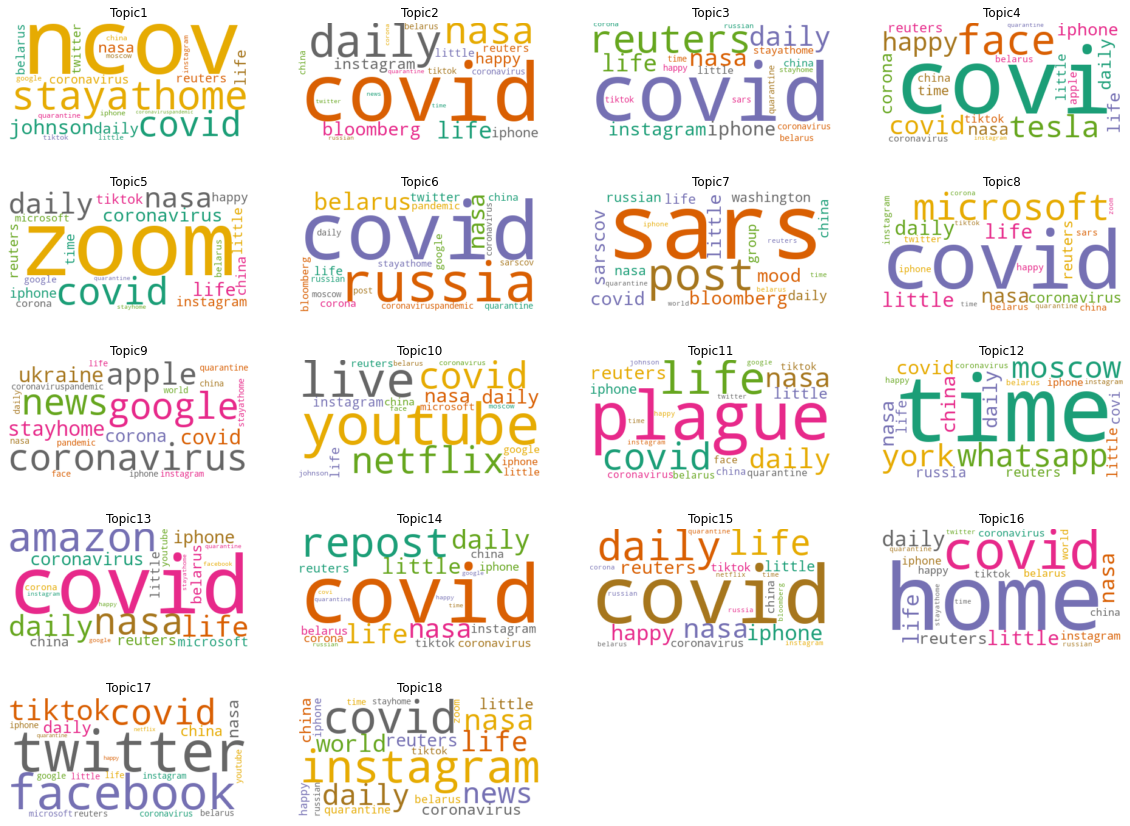

In [96]:
from wordcloud import WordCloud
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, lda.num_topics+1)] )
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(lda.num_topics):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

#### Русский

In [59]:
def objective_ru(trial):
    alpha = trial.suggest_float("alpha", 0.01, 1)
    eta = trial.suggest_float("eta", 0.01, 1)
    ntopics = trial.suggest_int("num_topics", 7, 35)

    model = LdaMulticore(
        workers=7,
        corpus=corpus_ru,
        id2word=dictionary_ru,
        num_topics=ntopics,
        random_state=10,
        passes=3,
        alpha=alpha,
        eta=eta,
        per_word_topics=True,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=ru.text, dictionary=dictionary_ru).get_coherence()
    print(f"Trial {trial.number} coherence score: {round(sc,3)}")
    return sc

In [60]:

study = optuna.create_study(direction='maximize')
study.optimize(objective_ru, n_trials=20)
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-10-04 18:13:08,620] A new study created in memory with name: no-name-7ff88727-ee03-41e1-a7ee-69904f3fa7d8
[I 2021-10-04 18:14:39,141] Trial 0 finished with value: 0.19497832830307227 and parameters: {'alpha': 0.8267431877961886, 'eta': 0.08719811960573608, 'num_topics': 26}. Best is trial 0 with value: 0.19497832830307227.


Trial 0 coherence score: 0.195


[I 2021-10-04 18:17:44,353] Trial 1 finished with value: 0.3045693959233011 and parameters: {'alpha': 0.24533216078725684, 'eta': 0.2809848280954472, 'num_topics': 35}. Best is trial 1 with value: 0.3045693959233011.


Trial 1 coherence score: 0.305


[I 2021-10-04 18:21:27,499] Trial 2 finished with value: 0.3144925354237621 and parameters: {'alpha': 0.37624091918738567, 'eta': 0.2555815629264889, 'num_topics': 7}. Best is trial 2 with value: 0.3144925354237621.


Trial 2 coherence score: 0.314


[I 2021-10-04 18:24:14,145] Trial 3 finished with value: 0.33075684295068536 and parameters: {'alpha': 0.02204322295283015, 'eta': 0.05297326128480815, 'num_topics': 8}. Best is trial 3 with value: 0.33075684295068536.


Trial 3 coherence score: 0.331


[I 2021-10-04 18:27:01,874] Trial 4 finished with value: 0.2686620645109545 and parameters: {'alpha': 0.6383750799935446, 'eta': 0.8790059015784334, 'num_topics': 12}. Best is trial 3 with value: 0.33075684295068536.


Trial 4 coherence score: 0.269


[I 2021-10-04 18:30:00,066] Trial 5 finished with value: 0.32955756808365083 and parameters: {'alpha': 0.057339911436878784, 'eta': 0.9583090531649039, 'num_topics': 31}. Best is trial 3 with value: 0.33075684295068536.


Trial 5 coherence score: 0.33


[I 2021-10-04 18:31:24,696] Trial 6 finished with value: 0.19345381592524907 and parameters: {'alpha': 0.9012762490250726, 'eta': 0.9939729159986883, 'num_topics': 26}. Best is trial 3 with value: 0.33075684295068536.


Trial 6 coherence score: 0.193


[I 2021-10-04 18:34:23,090] Trial 7 finished with value: 0.32187935455815053 and parameters: {'alpha': 0.0907387556123991, 'eta': 0.5275446744800547, 'num_topics': 13}. Best is trial 3 with value: 0.33075684295068536.


Trial 7 coherence score: 0.322


[I 2021-10-04 18:37:29,973] Trial 8 finished with value: 0.28141934110971056 and parameters: {'alpha': 0.4277746963755045, 'eta': 0.2122545481935766, 'num_topics': 18}. Best is trial 3 with value: 0.33075684295068536.


Trial 8 coherence score: 0.281


[I 2021-10-04 18:38:54,180] Trial 9 finished with value: 0.19010891968738317 and parameters: {'alpha': 0.9560740111188007, 'eta': 0.45750278232329844, 'num_topics': 25}. Best is trial 3 with value: 0.33075684295068536.


Trial 9 coherence score: 0.19


[I 2021-10-04 18:41:55,776] Trial 10 finished with value: 0.27444489074608036 and parameters: {'alpha': 0.6086922794175514, 'eta': 0.01139283979916772, 'num_topics': 8}. Best is trial 3 with value: 0.33075684295068536.


Trial 10 coherence score: 0.274


[I 2021-10-04 18:44:40,340] Trial 11 finished with value: 0.3204015084764072 and parameters: {'alpha': 0.014426322811521026, 'eta': 0.7034254905143794, 'num_topics': 33}. Best is trial 3 with value: 0.33075684295068536.


Trial 11 coherence score: 0.32


[I 2021-10-04 18:47:44,148] Trial 12 finished with value: 0.2945674897165286 and parameters: {'alpha': 0.14825513329822104, 'eta': 0.6507731257027503, 'num_topics': 21}. Best is trial 3 with value: 0.33075684295068536.


Trial 12 coherence score: 0.295


[I 2021-10-04 18:51:01,880] Trial 13 finished with value: 0.3096153218480996 and parameters: {'alpha': 0.24091179674712926, 'eta': 0.8060098212008762, 'num_topics': 30}. Best is trial 3 with value: 0.33075684295068536.


Trial 13 coherence score: 0.31


[I 2021-10-04 18:53:54,311] Trial 14 finished with value: 0.3075952337586358 and parameters: {'alpha': 0.01251021897649418, 'eta': 0.43495494858906014, 'num_topics': 18}. Best is trial 3 with value: 0.33075684295068536.


Trial 14 coherence score: 0.308


[I 2021-10-04 18:57:11,459] Trial 15 finished with value: 0.30982227084715247 and parameters: {'alpha': 0.2734716323534021, 'eta': 0.5610792171186564, 'num_topics': 29}. Best is trial 3 with value: 0.33075684295068536.


Trial 15 coherence score: 0.31


[I 2021-10-04 19:00:19,197] Trial 16 finished with value: 0.31509958603086197 and parameters: {'alpha': 0.1580624215449088, 'eta': 0.37560531338045494, 'num_topics': 13}. Best is trial 3 with value: 0.33075684295068536.


Trial 16 coherence score: 0.315


[I 2021-10-04 19:03:07,227] Trial 17 finished with value: 0.26414689504532274 and parameters: {'alpha': 0.5252207896011214, 'eta': 0.9898711176432804, 'num_topics': 22}. Best is trial 3 with value: 0.33075684295068536.


Trial 17 coherence score: 0.264


[I 2021-10-04 19:06:37,769] Trial 18 finished with value: 0.2812532213444678 and parameters: {'alpha': 0.3419720165247623, 'eta': 0.15038050690990104, 'num_topics': 17}. Best is trial 3 with value: 0.33075684295068536.


Trial 18 coherence score: 0.281


[I 2021-10-04 19:08:09,335] Trial 19 finished with value: 0.1936240763190865 and parameters: {'alpha': 0.749360639795106, 'eta': 0.7823553594519681, 'num_topics': 30}. Best is trial 3 with value: 0.33075684295068536.


Trial 19 coherence score: 0.194
Accuracy: 0.33075684295068536
Best hyperparameters: {'alpha': 0.02204322295283015, 'eta': 0.05297326128480815, 'num_topics': 8}


In [21]:
def objective_ru(trial):
    alpha = trial.suggest_uniform("alpha", 0.005, 1)
    eta = trial.suggest_uniform("eta", 0.005, 1)
    ntopics = trial.suggest_int("num_topics", 7, 35)
    # gamma  = trial.suggest_float("gamma", 0.001, 1)
    passes = trial.suggest_int("passes", 2, 7)

    model = LdaMulticore(
        workers=7,
        corpus=corpus_ru,
        id2word=dictionary_ru,
        num_topics=ntopics,
        random_state=10,
        passes=passes,
        alpha=alpha,
        eta=eta,
        per_word_topics=True,
        # gamma_threshold = gamma,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=ru.text, dictionary=dictionary_ru).get_coherence()
    print(f"Trial {trial.number} coherence score: {round(sc,3)}")
    return sc

In [22]:

study = optuna.create_study(direction='maximize')
study.optimize(objective_ru, n_trials=20)
trial_ru = study.best_trial

print('Coherence: {}'.format(trial_ru.value))
print("Best hyperparameters: {}".format(trial_ru.params))

[I 2021-10-05 10:12:54,248] A new study created in memory with name: no-name-4f2d2495-57fd-41e0-85a7-f93d9b7c1df4
[I 2021-10-05 10:15:06,860] Trial 0 finished with value: 0.20709800497165148 and parameters: {'alpha': 0.6155695051899001, 'eta': 0.5335899034549616, 'num_topics': 31, 'passes': 4}. Best is trial 0 with value: 0.20709800497165148.


Trial 0 coherence score: 0.207


[I 2021-10-05 10:18:55,198] Trial 1 finished with value: 0.2650050460756473 and parameters: {'alpha': 0.7409116842841311, 'eta': 0.09063928358250557, 'num_topics': 22, 'passes': 7}. Best is trial 1 with value: 0.2650050460756473.


Trial 1 coherence score: 0.265


[I 2021-10-05 10:23:26,795] Trial 2 finished with value: 0.2899094319799216 and parameters: {'alpha': 0.7450196485940168, 'eta': 0.3948409974815212, 'num_topics': 12, 'passes': 7}. Best is trial 2 with value: 0.2899094319799216.


Trial 2 coherence score: 0.29


[I 2021-10-05 10:26:41,592] Trial 3 finished with value: 0.30046418159411015 and parameters: {'alpha': 0.2472331256610057, 'eta': 0.7921342216985994, 'num_topics': 14, 'passes': 3}. Best is trial 3 with value: 0.30046418159411015.


Trial 3 coherence score: 0.3


[I 2021-10-05 10:31:46,751] Trial 4 finished with value: 0.3282777261124296 and parameters: {'alpha': 0.026305342169059182, 'eta': 0.10125008061993918, 'num_topics': 9, 'passes': 7}. Best is trial 4 with value: 0.3282777261124296.


Trial 4 coherence score: 0.328


[I 2021-10-05 10:32:51,108] Trial 5 finished with value: 0.18994530119030648 and parameters: {'alpha': 0.6264346738419033, 'eta': 0.8337652583685625, 'num_topics': 30, 'passes': 2}. Best is trial 4 with value: 0.3282777261124296.


Trial 5 coherence score: 0.19


[I 2021-10-05 10:35:37,150] Trial 6 finished with value: 0.19917229438573766 and parameters: {'alpha': 0.8231663776554512, 'eta': 0.02988161188944163, 'num_topics': 34, 'passes': 6}. Best is trial 4 with value: 0.3282777261124296.


Trial 6 coherence score: 0.199


[I 2021-10-05 10:39:56,985] Trial 7 finished with value: 0.28763800742392637 and parameters: {'alpha': 0.4769112131424004, 'eta': 0.5010032728125915, 'num_topics': 28, 'passes': 6}. Best is trial 4 with value: 0.3282777261124296.


Trial 7 coherence score: 0.288


[I 2021-10-05 10:43:11,579] Trial 8 finished with value: 0.2764610205100192 and parameters: {'alpha': 0.32517163557781187, 'eta': 0.692745233081846, 'num_topics': 26, 'passes': 3}. Best is trial 4 with value: 0.3282777261124296.


Trial 8 coherence score: 0.276


[I 2021-10-05 10:45:14,167] Trial 9 finished with value: 0.27127293724961077 and parameters: {'alpha': 0.10554429268741297, 'eta': 0.29836468065491645, 'num_topics': 32, 'passes': 2}. Best is trial 4 with value: 0.3282777261124296.


Trial 9 coherence score: 0.271


[I 2021-10-05 10:48:57,129] Trial 10 finished with value: 0.3410898387898005 and parameters: {'alpha': 0.031233172628224275, 'eta': 0.22708982559920027, 'num_topics': 7, 'passes': 5}. Best is trial 10 with value: 0.3410898387898005.


Trial 10 coherence score: 0.341


[I 2021-10-05 10:52:43,954] Trial 11 finished with value: 0.34397715813499646 and parameters: {'alpha': 0.0522545905422338, 'eta': 0.2290330050624295, 'num_topics': 7, 'passes': 5}. Best is trial 11 with value: 0.34397715813499646.


Trial 11 coherence score: 0.344


[I 2021-10-05 10:57:01,539] Trial 12 finished with value: 0.3614761386567342 and parameters: {'alpha': 0.18796558253693615, 'eta': 0.21935448760549808, 'num_topics': 7, 'passes': 5}. Best is trial 12 with value: 0.3614761386567342.


Trial 12 coherence score: 0.361


[I 2021-10-05 11:01:55,415] Trial 13 finished with value: 0.3116653492720725 and parameters: {'alpha': 0.25687115304781377, 'eta': 0.24601515891110823, 'num_topics': 17, 'passes': 5}. Best is trial 12 with value: 0.3614761386567342.


Trial 13 coherence score: 0.312


[I 2021-10-05 11:05:56,326] Trial 14 finished with value: 0.3187035949758892 and parameters: {'alpha': 0.1918531459902478, 'eta': 0.9888383843228654, 'num_topics': 18, 'passes': 4}. Best is trial 12 with value: 0.3614761386567342.


Trial 14 coherence score: 0.319


[I 2021-10-05 11:10:38,919] Trial 15 finished with value: 0.3102683739290208 and parameters: {'alpha': 0.39029139351644854, 'eta': 0.4355240820790964, 'num_topics': 11, 'passes': 5}. Best is trial 12 with value: 0.3614761386567342.


Trial 15 coherence score: 0.31


[I 2021-10-05 11:15:27,021] Trial 16 finished with value: 0.36579439604758424 and parameters: {'alpha': 0.16720885843634734, 'eta': 0.17913792113661559, 'num_topics': 7, 'passes': 6}. Best is trial 16 with value: 0.36579439604758424.


Trial 16 coherence score: 0.366


[I 2021-10-05 11:18:27,723] Trial 17 finished with value: 0.2600956097806135 and parameters: {'alpha': 0.998358125976716, 'eta': 0.1608706085669962, 'num_topics': 15, 'passes': 6}. Best is trial 16 with value: 0.36579439604758424.


Trial 17 coherence score: 0.26


[I 2021-10-05 11:23:33,749] Trial 18 finished with value: 0.32151511964272894 and parameters: {'alpha': 0.16507564437178457, 'eta': 0.334353659511159, 'num_topics': 22, 'passes': 6}. Best is trial 16 with value: 0.36579439604758424.


Trial 18 coherence score: 0.322


[I 2021-10-05 11:27:22,841] Trial 19 finished with value: 0.3042249405960519 and parameters: {'alpha': 0.3979349016995969, 'eta': 0.008746771382740604, 'num_topics': 11, 'passes': 4}. Best is trial 16 with value: 0.36579439604758424.


Trial 19 coherence score: 0.304
Coherence: 0.36579439604758424
Best hyperparameters: {'alpha': 0.16720885843634734, 'eta': 0.17913792113661559, 'num_topics': 7, 'passes': 6}


In [23]:
trial_ru.params

{'alpha': 0.16720885843634734,
 'eta': 0.17913792113661559,
 'num_topics': 7,
 'passes': 6}

In [17]:
lda_ru = LdaMulticore(corpus=corpus_ru, id2word=dictionary_ru, num_topics=11, random_state=42)
coherence_model_lda = CoherenceModel(model=lda_ru, texts=ru.text, dictionary=dictionary_ru)
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.32984134042538105

In [88]:
lda_ru = LdaMulticore(workers=7, corpus=corpus_ru, id2word=dictionary_ru, num_topics=7, passes=6, alpha=0.16720885843634734, random_state=10, eta=0.17913792113661559)
print('\nCoherence: ', CoherenceModel(model=lda_ru, texts=ru.text, dictionary=dictionary_ru).get_coherence())
print('\nPerplexity: ', lda_ru.log_perplexity(corpus_ru))  # a measure of how good the model is. lower the better.


Coherence:  0.37119581230779275

Perplexity:  -7.640731653109098


#### Mallet LDA

In [20]:
%%capture
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [21]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'


In [22]:
import gensim

In [44]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_ru, workers=7, num_topics=8, id2word=dictionary_ru)
CoherenceModel(model=ldamallet, texts=ru.text, dictionary=dictionary_ru).get_coherence()

0.3929232759630886

In [53]:
def objective_mallet(trial):
    alpha = trial.suggest_float("alpha", 0.005, 100)
    ntopics = trial.suggest_int("num_topics", 7, 35)
    iter = trial.suggest_int("iter", 100, 500)
    th = trial.suggest_float("th", 0, 50)
    model = gensim.models.wrappers.LdaMallet(mallet_path,
        workers=7,
        corpus=corpus_ru,
        id2word=dictionary_ru,
        num_topics=ntopics,
        alpha=alpha,
        iterations=iter,
        topic_threshold=th,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=ru.text, dictionary=dictionary_ru).get_coherence()
    print(f"Trial {trial.number} coherence score: {round(sc,3)}")
    return sc

In [54]:

study = optuna.create_study(direction='maximize')
study.optimize(objective_mallet, n_trials=20)
trial_ru = study.best_trial

print('Coherence: {}'.format(trial_ru.value))
print("Best hyperparameters: {}".format(trial_ru.params))

[I 2021-10-05 15:29:42,843] A new study created in memory with name: no-name-7b66a8ca-1c29-4d8c-b18d-2dae1bc386ca
[I 2021-10-05 15:31:13,608] Trial 0 finished with value: 0.2901950958935901 and parameters: {'alpha': 96.56545375608016, 'num_topics': 23, 'iter': 213, 'th': 46.206803456455376}. Best is trial 0 with value: 0.2901950958935901.


Trial 0 coherence score: 0.29


[I 2021-10-05 15:32:21,473] Trial 1 finished with value: 0.29446923570449435 and parameters: {'alpha': 57.16962566010215, 'num_topics': 20, 'iter': 130, 'th': 47.92900673548908}. Best is trial 1 with value: 0.29446923570449435.


Trial 1 coherence score: 0.294


[I 2021-10-05 15:33:22,663] Trial 2 finished with value: 0.37779419943280085 and parameters: {'alpha': 1.7911280675560046, 'num_topics': 14, 'iter': 135, 'th': 4.66293108013926}. Best is trial 2 with value: 0.37779419943280085.


Trial 2 coherence score: 0.378


[I 2021-10-05 15:35:34,474] Trial 3 finished with value: 0.3141057718503182 and parameters: {'alpha': 63.17441289663557, 'num_topics': 30, 'iter': 385, 'th': 22.47706587119691}. Best is trial 2 with value: 0.37779419943280085.


Trial 3 coherence score: 0.314


[I 2021-10-05 15:37:46,606] Trial 4 finished with value: 0.3606144908101874 and parameters: {'alpha': 31.070800031960523, 'num_topics': 32, 'iter': 399, 'th': 11.623765111236212}. Best is trial 2 with value: 0.37779419943280085.


Trial 4 coherence score: 0.361


[I 2021-10-05 15:39:16,592] Trial 5 finished with value: 0.36765492651424997 and parameters: {'alpha': 28.705203425347644, 'num_topics': 28, 'iter': 212, 'th': 22.65768521065682}. Best is trial 2 with value: 0.37779419943280085.


Trial 5 coherence score: 0.368


[I 2021-10-05 15:40:38,812] Trial 6 finished with value: 0.4202408455880105 and parameters: {'alpha': 6.222443606275627, 'num_topics': 18, 'iter': 226, 'th': 12.62577246973325}. Best is trial 6 with value: 0.4202408455880105.


Trial 6 coherence score: 0.42


[I 2021-10-05 15:41:46,890] Trial 7 finished with value: 0.3976028092665057 and parameters: {'alpha': 20.607593955175297, 'num_topics': 21, 'iter': 140, 'th': 15.684538584367457}. Best is trial 6 with value: 0.4202408455880105.


Trial 7 coherence score: 0.398


KeyboardInterrupt: ignored

In [ ]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_ru, workers=7, num_topics=18, id2word=dictionary_ru, alpha=6.22, iterations=226, topic_threshold=13)
print('\nCoherence: ', CoherenceModel(model=lda_mallet, texts=ru.text, dictionary=dictionary_ru).get_coherence())
# print('\nPerplexity: ', lda_mallet.log_perplexity(corpus_ru))  # a measure of how good the model is. lower the better.

In [143]:
def objective_mallet_en(trial):
    alpha = trial.suggest_float("alpha", 0.005, 100)
    ntopics = trial.suggest_int("num_topics", 7, 35)
    iter = trial.suggest_int("iter", 100, 500)
    th = trial.suggest_float("th", 0, 50)
    model = gensim.models.wrappers.LdaMallet(mallet_path,
        workers=7,
        corpus=corpus_en,
        id2word=dictionary_en,
        num_topics=ntopics,
        alpha=alpha,
        iterations=iter,
        topic_threshold=th,
    )
    # coherence_score = compute_coherence(model, en.text, dictionary_en)
    sc = CoherenceModel(model, texts=en.text, dictionary=dictionary_en).get_coherence()
    print(f"Trial {trial.number} coherence score: {round(sc,3)}")
    return sc

study = optuna.create_study(direction='maximize')
study.optimize(objective_mallet_en, n_trials=20)
trial_en = study.best_trial

print('Coherence: {}'.format(trial_en.value))
print("Best hyperparameters: {}".format(trial_en.params))

[I 2021-10-05 18:09:52,386] A new study created in memory with name: no-name-07a2c60f-2e70-4d68-b3e7-fe2f03fdec12
[I 2021-10-05 18:10:16,400] Trial 0 finished with value: 0.6128166504241525 and parameters: {'alpha': 72.74799461673244, 'num_topics': 8, 'iter': 259, 'th': 28.811584074257773}. Best is trial 0 with value: 0.6128166504241525.


Trial 0 coherence score: 0.613


[I 2021-10-05 18:10:35,924] Trial 1 finished with value: 0.6319310174135901 and parameters: {'alpha': 1.5495585267330474, 'num_topics': 16, 'iter': 113, 'th': 20.368807922439924}. Best is trial 1 with value: 0.6319310174135901.


Trial 1 coherence score: 0.632


[I 2021-10-05 18:11:08,597] Trial 2 finished with value: 0.6502800534646748 and parameters: {'alpha': 22.001168545323928, 'num_topics': 25, 'iter': 498, 'th': 15.309873435496735}. Best is trial 2 with value: 0.6502800534646748.


Trial 2 coherence score: 0.65


[I 2021-10-05 18:11:38,715] Trial 3 finished with value: 0.6572238905934669 and parameters: {'alpha': 64.4408122756843, 'num_topics': 25, 'iter': 433, 'th': 3.502741640400825}. Best is trial 3 with value: 0.6572238905934669.


Trial 3 coherence score: 0.657


[I 2021-10-05 18:12:03,606] Trial 4 finished with value: 0.6508758134695474 and parameters: {'alpha': 32.24000863155222, 'num_topics': 31, 'iter': 233, 'th': 34.192224517141554}. Best is trial 3 with value: 0.6572238905934669.


Trial 4 coherence score: 0.651


[I 2021-10-05 18:12:33,641] Trial 5 finished with value: 0.6322640675928402 and parameters: {'alpha': 58.70494636450141, 'num_topics': 13, 'iter': 435, 'th': 25.212581305450517}. Best is trial 3 with value: 0.6572238905934669.


Trial 5 coherence score: 0.632


[I 2021-10-05 18:13:05,621] Trial 6 finished with value: 0.6499706864439292 and parameters: {'alpha': 87.64968060130397, 'num_topics': 19, 'iter': 457, 'th': 6.710711199428982}. Best is trial 3 with value: 0.6572238905934669.


Trial 6 coherence score: 0.65


[I 2021-10-05 18:13:26,162] Trial 7 finished with value: 0.6477956694174151 and parameters: {'alpha': 50.95524764091035, 'num_topics': 34, 'iter': 135, 'th': 36.09568879654316}. Best is trial 3 with value: 0.6572238905934669.


Trial 7 coherence score: 0.648


KeyboardInterrupt: ignored

In [ ]:
lda_mallet_en = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_en, workers=7, num_topics=13, id2word=dictionary_en, alpha=59, iterations=435, topic_threshold=25)
print('\nCoherence: ', CoherenceModel(model=lda_mallet_en, texts=en.text, dictionary=dictionary_en).get_coherence())

In [27]:

from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim


In [58]:
ldagensim = convertldaMalletToldaGen(lda_mallet) 
print('\nPerplexity: ', ldagensim.log_perplexity(corpus_ru))  # a measure of how good the model is. lower the better.


Perplexity:  -7.688430061300533


In [153]:
ldagensim_en = convertldaMalletToldaGen(lda_mallet_en)
# print('\nPerplexity: ', ldagensim_en.log_perplexity(corpus_en))  # a measure of how good the model is. lower the better.


Perplexity:  -1.721007765771665


In [92]:
topics = [[(term, round(wt, 3)) for term, wt in lda_mallet.show_topic(n, topn=20)] for n in range(0, lda_mallet.num_topics)]
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, lda_mallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15
Term1,карантин,карантин,вирус,пандемия,карантин,коронавирус,карантин,тест,карантин,маска,covid,вирус,коронавирус,covid,маска
Term2,хотеть,время,covid,эпидемия,сидеть,covid,день,карантин,самоизоляция,аптека,коронавирус,человек,россия,тест,человек
Term3,время,самый,коронавирус,время,человек,распространение,неделя,делать,режим,купить,случай,корона,пандемия,больница,улица
Term4,блядь,человек,вакцина,вирус,друг,россия,идти,сделать,ввести,медицинский,новый,статистика,борьба,врач,ходить
Term5,сидеть,жизнь,китай,коронавирус,ребёнок,инфекция,месяц,корона,москва,магазин,заражение,большой,covid,коронавирус,носить


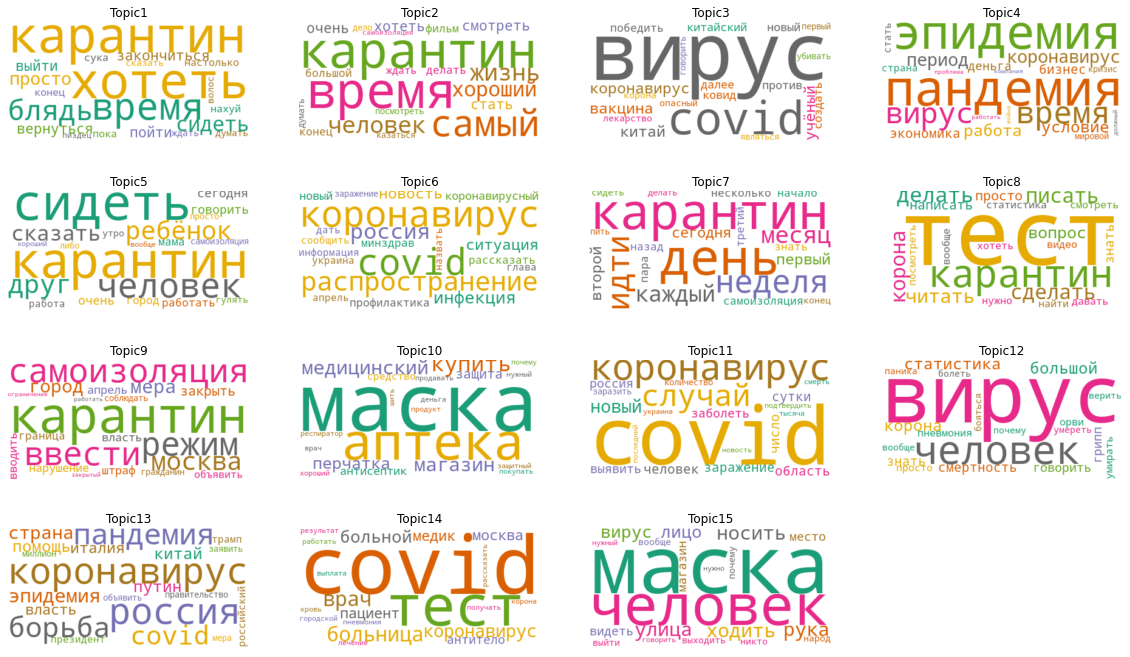

In [94]:
from wordcloud import WordCloud
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, lda_mallet.num_topics+1)] )
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(lda_mallet.num_topics):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

#### Визуализация

In [1]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models  as gensimvis
import pyLDAvis

In [154]:
# ldagensim.save(path+'LDA/ldagensim.model')
ldagensim_en.save(path+'LDA/ldagensim_en.model')

In [155]:
lda_en = LdaMulticore.load(path+'LDA/ldagensim_en.model')
lda_ru = LdaMulticore.load(path+'LDA/ldagensim.model')


In [62]:

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_ru, corpus_ru, dictionary_ru)
vis
# vis_data = gensimvis.prepare(ldagensim, corpus_ru, dictionary_ru, sort_topics=False)
# pyLDAvis.display(vis_data)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14    -0.265342 -0.036859       1        1  6.789261
5     -0.316773 -0.058707       2        1  5.757744
12     0.210308 -0.050440       3        1  5.664681
16    -0.248748 -0.094640       4        1  5.659115
4      0.227289 -0.117605       5        1  5.628589
2      0.045445  0.286796       6        1  5.565476
7      0.043555 -0.203231       7        1  5.562959
9      0.225129 -0.177261       8        1  5.559901
1     -0.236635  0.048614       9        1  5.545170
6      0.098079  0.205351      10        1  5.530162
10     0.194573 -0.212801      11        1  5.527813
13     0.176264  0.182032      12        1  5.490158
11     0.142394 -0.061031      13        1  5.443016
8      0.070855  0.091849      14        1  5.423858
15     0.115293  0.194560      15        1  5.340980
0     -0.160200  0.113762      16        1  5.232505
3     -0.076574 -0.042964      17        1  5.164153
17    -0.244908 -0.067425      18        1  5.114457, topic_info=         Term          Freq         Total Category  logprob  loglift
24   карантин  34167.000000  34167.000000  Default  30.0000  30.0000
31      маска  16739.000000  16739.000000  Default  29.0000  29.0000
81      covid  18464.000000  18464.000000  Default  28.0000  28.0000
0       вирус  13985.000000  13985.000000  Default  27.0000  27.0000
43       день   6663.000000   6663.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
227   новость    430.956428   2450.092304  Topic18  -4.8029   1.2352
598     далее    312.228753    794.159760  Topic18  -5.1252   2.0396
512    начать    340.887167   1631.244800  Topic18  -5.0374   1.4076
541      дать    331.675541   1659.914099  Topic18  -5.0648   1.3627
220     новый    336.793097   4481.443808  Topic18  -5.0495   0.3849

[1235 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
81        1  0.302801   covid
81        2  0.175095   covid
81        4  0.034499   covid
81        9  0.158252   covid
81       18  0.329339   covid
...     ...       ...     ...
111       3  0.005317   южный
4328     13  0.987195   ютуба
277      13  0.996450    язык
2444      8  0.060907  ёбаный
2444     12  0.934918  ёбаный

[2345 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 6, 13, 17, 5, 3, 8, 10, 2, 7, 11, 14, 12, 9, 16, 1, 4, 18])

In [156]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_en, corpus_en, dictionary_en)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.114469 -0.011863       1        1  7.715808
9     -0.024870  0.039760       2        1  7.699418
8      0.030890  0.037967       3        1  7.699122
12    -0.032300  0.006336       4        1  7.693245
10     0.022413 -0.027210       5        1  7.691285
1      0.019856 -0.011490       6        1  7.690503
5      0.016048 -0.004423       7        1  7.689499
3      0.013560 -0.003907       8        1  7.688752
2      0.019306 -0.009624       9        1  7.688081
7      0.007086 -0.004742      10        1  7.688021
11     0.015387 -0.004666      11        1  7.686064
4      0.012618 -0.002543      12        1  7.685136
0      0.014476 -0.003595      13        1  7.685066, topic_info=             Term        Freq       Total Category  logprob  loglift
2     coronavirus  420.000000  420.000000  Default   30.000  30.0000
91           news  166.000000  166.000000  Default   29.000  29.0000
2737      twitter  167.000000  167.000000  Default   28.000  28.0000
3565         sars   90.000000   90.000000  Default   27.000  27.0000
1490       google   54.000000   54.000000  Default   26.000  26.0000
...           ...         ...         ...      ...      ...      ...
24          cases    0.055779    0.702077  Topic13  -10.297   0.0332
25         county    0.055779    0.702077  Topic13  -10.297   0.0332
26         lifted    0.055779    0.702077  Topic13  -10.297   0.0332
2     coronavirus    0.055779  420.667624  Topic13  -10.297  -6.3623
3            life    0.055779   12.687746  Topic13  -10.297  -2.8611

[455 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
187       7  0.932500     amazon
1489      3  0.920403      apple
1489     12  0.062755      apple
5599      9  0.978818    belarus
5108      1  0.885303  bloomberg
...     ...       ...        ...
642       6  0.073368       york
642       8  0.880417       york
838       1  0.995339    youtube
4555      1  0.878303       zoom
4555     10  0.067562       zoom

[100 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 9, 13, 11, 2, 6, 4, 3, 8, 12, 5, 1])

## Tone

#### dostoevsky

In [64]:
ru

,text,date,raw_text,lang
0,"[помнить, ухань, мужчина, короновирус, масло, ...",Wed Apr 22 12:50:58 +0000 2020,А помните в Ухане мужчина с короновирусом в ра...,ru
1,"[выходить, выкинуть, мусор, сосед, напротив, в...",Wed Apr 15 18:30:08 +0000 2020,"выходила выкинуть мусор под домом, а дед-сосед...",ru
2,"[бесить, слово, коронавирус, появление, жизнь]",Tue May 05 09:08:05 +0000 2020,"Меня бесит слово ""коронавирус"" уже с самого ег...",ru
3,"[коммент, обсуждение, раскупать, магазин, врем...",Tue Mar 17 09:06:58 +0000 2020,топ коммент обсуждения что раскупают в магазин...,ru
4,"[действительно, делаться, очень, многое, прода...",Fri Mar 27 18:18:40 +0000 2020,"@dima_29ss @sd100674 Действительно, делается о...",ru
...,...,...,...,...
138960,"[грузия, рассчитывать, белорусский, турист, сп...",Thu May 21 09:21:21 +0000 2020,Грузия рассчитывает на белорусских туристов по...,ru
138961,"[никто, сломать, таджик, носитель, корона]",Sun Mar 08 08:00:31 +0000 2020,"@jksbabyboo Нас никогда никто не сломает, мы-т...",ru
138962,"[россия, нормально, долбоеб, принимать, решение]",Wed Apr 15 10:25:34 +0000 2020,"Так в России, это нормально, когда долбоебы пр...",ru
138963,"[коротко, ситуация, короновирус, город, массов...",Sun Mar 15 17:09:07 +0000 2020,Коротко о ситуации с короновирусом в моем горо...,ru


In [66]:
!pip install dostoevsky

     |████████████████████████████████| 68 kB 3.4 MB/s 
  Using cached pybind11-2.8.0-py2.py3-none-any.whl (207 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3124764 sha256=7c12e56c9e6ac54fdb43baa003b23daa5ededb2044b32a53bb9db5eb015f3fa3
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [67]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [69]:
!python -m dostoevsky download fasttext-social-network-model


In [107]:


tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [84]:
# ru['text_str'] = ru.text.apply(lambda x: ' '.join(x))
messages = ru.text_str.to_list()
ru['tones'] = model.predict(messages, k=10)
ru

,text,date,raw_text,lang,text_str,tones
0,"[помнить, ухань, мужчина, короновирус, масло, ...",Wed Apr 22 12:50:58 +0000 2020,А помните в Ухане мужчина с короновирусом в ра...,ru,помнить ухань мужчина короновирус масло упасть...,"{'skip': 0.40734341740608215, 'neutral': 0.250..."
1,"[выходить, выкинуть, мусор, сосед, напротив, в...",Wed Apr 15 18:30:08 +0000 2020,"выходила выкинуть мусор под домом, а дед-сосед...",ru,выходить выкинуть мусор сосед напротив выйти к...,"{'skip': 0.6926519870758057, 'negative': 0.294..."
2,"[бесить, слово, коронавирус, появление, жизнь]",Tue May 05 09:08:05 +0000 2020,"Меня бесит слово ""коронавирус"" уже с самого ег...",ru,бесить слово коронавирус появление жизнь,"{'negative': 0.8354935646057129, 'positive': 0..."
3,"[коммент, обсуждение, раскупать, магазин, врем...",Tue Mar 17 09:06:58 +0000 2020,топ коммент обсуждения что раскупают в магазин...,ru,коммент обсуждение раскупать магазин время кар...,"{'neutral': 0.7663036584854126, 'negative': 0...."
4,"[действительно, делаться, очень, многое, прода...",Fri Mar 27 18:18:40 +0000 2020,"@dima_29ss @sd100674 Действительно, делается о...",ru,действительно делаться очень многое продать ма...,"{'neutral': 0.9304682612419128, 'negative': 0...."
...,...,...,...,...,...,...
138960,"[грузия, рассчитывать, белорусский, турист, сп...",Thu May 21 09:21:21 +0000 2020,Грузия рассчитывает на белорусских туристов по...,ru,грузия рассчитывать белорусский турист спад эп...,"{'neutral': 0.9740526676177979, 'negative': 0...."
138961,"[никто, сломать, таджик, носитель, корона]",Sun Mar 08 08:00:31 +0000 2020,"@jksbabyboo Нас никогда никто не сломает, мы-т...",ru,никто сломать таджик носитель корона,"{'neutral': 0.880807101726532, 'negative': 0.2..."
138962,"[россия, нормально, долбоеб, принимать, решение]",Wed Apr 15 10:25:34 +0000 2020,"Так в России, это нормально, когда долбоебы пр...",ru,россия нормально долбоеб принимать решение,"{'neutral': 0.5544804334640503, 'negative': 0...."
138963,"[коротко, ситуация, короновирус, город, массов...",Sun Mar 15 17:09:07 +0000 2020,Коротко о ситуации с короновирусом в моем горо...,ru,коротко ситуация короновирус город массово ску...,"{'neutral': 0.7186043858528137, 'negative': 0...."


In [91]:
ru['tones'] = model.predict(messages, k=-1)
ru

,text,date,raw_text,lang,text_str,tones
0,"[помнить, ухань, мужчина, короновирус, масло, ...",Wed Apr 22 12:50:58 +0000 2020,А помните в Ухане мужчина с короновирусом в ра...,ru,помнить ухань мужчина короновирус масло упасть...,"{'skip': 0.40734341740608215, 'neutral': 0.250..."
1,"[выходить, выкинуть, мусор, сосед, напротив, в...",Wed Apr 15 18:30:08 +0000 2020,"выходила выкинуть мусор под домом, а дед-сосед...",ru,выходить выкинуть мусор сосед напротив выйти к...,"{'skip': 0.6926519870758057, 'negative': 0.294..."
2,"[бесить, слово, коронавирус, появление, жизнь]",Tue May 05 09:08:05 +0000 2020,"Меня бесит слово ""коронавирус"" уже с самого ег...",ru,бесить слово коронавирус появление жизнь,"{'negative': 0.8354935646057129, 'positive': 0..."
3,"[коммент, обсуждение, раскупать, магазин, врем...",Tue Mar 17 09:06:58 +0000 2020,топ коммент обсуждения что раскупают в магазин...,ru,коммент обсуждение раскупать магазин время кар...,"{'neutral': 0.7663036584854126, 'negative': 0...."
4,"[действительно, делаться, очень, многое, прода...",Fri Mar 27 18:18:40 +0000 2020,"@dima_29ss @sd100674 Действительно, делается о...",ru,действительно делаться очень многое продать ма...,"{'neutral': 0.9304682612419128, 'negative': 0...."
...,...,...,...,...,...,...
138960,"[грузия, рассчитывать, белорусский, турист, сп...",Thu May 21 09:21:21 +0000 2020,Грузия рассчитывает на белорусских туристов по...,ru,грузия рассчитывать белорусский турист спад эп...,"{'neutral': 0.9740526676177979, 'negative': 0...."
138961,"[никто, сломать, таджик, носитель, корона]",Sun Mar 08 08:00:31 +0000 2020,"@jksbabyboo Нас никогда никто не сломает, мы-т...",ru,никто сломать таджик носитель корона,"{'neutral': 0.880807101726532, 'negative': 0.2..."
138962,"[россия, нормально, долбоеб, принимать, решение]",Wed Apr 15 10:25:34 +0000 2020,"Так в России, это нормально, когда долбоебы пр...",ru,россия нормально долбоеб принимать решение,"{'neutral': 0.5544804334640503, 'negative': 0...."
138963,"[коротко, ситуация, короновирус, город, массов...",Sun Mar 15 17:09:07 +0000 2020,Коротко о ситуации с короновирусом в моем горо...,ru,коротко ситуация короновирус город массово ску...,"{'neutral': 0.7186043858528137, 'negative': 0...."


In [94]:
ru.loc[3, 'tones']

{'negative': 0.06009664759039879,
 'neutral': 0.7663036584854126,
 'positive': 0.014073628932237625,
 'skip': 0.048867784440517426,
 'speech': 1.0000003385357559e-05}

### LIWC

#### LIWC RUS

In [98]:
!pip install -U liwc

In [106]:
parse_ru, category_names_ru = liwc.load_token_parser('Russian_LIWC2007_Dictionary.dic')

In [108]:
def fun_sentiment_analysis_ru(text):
    counter = dict(Counter(category for token in text for category in parse_ru(token)))
    total = sum(counter.values())
    ans = []
    for x in counter:
        ans.append((x, counter[x] / total))
    return dict(ans)

In [109]:
ru['sentiment_an'] = ru.text.progress_apply(lambda x: fun_sentiment_analysis_ru(x))


100%|██████████| 138965/138965 [00:06<00:00, 22820.16it/s]


In [110]:
ru

,text,date,raw_text,lang,text_str,tones,sentiment_an
0,"[помнить, ухань, мужчина, короновирус, масло, ...",Wed Apr 22 12:50:58 +0000 2020,А помните в Ухане мужчина с короновирусом в ра...,ru,помнить ухань мужчина короновирус масло упасть...,"{'skip': 0.40734341740608215, 'neutral': 0.250...","{'Когнитив': 0.1, 'Интуиция': 0.1, 'Общество':..."
1,"[выходить, выкинуть, мусор, сосед, напротив, в...",Wed Apr 15 18:30:08 +0000 2020,"выходила выкинуть мусор под домом, а дед-сосед...",ru,выходить выкинуть мусор сосед напротив выйти к...,"{'skip': 0.6926519870758057, 'negative': 0.294...","{'Сравнение': 0.13333333333333333, 'Стимул': 0..."
2,"[бесить, слово, коронавирус, появление, жизнь]",Tue May 05 09:08:05 +0000 2020,"Меня бесит слово ""коронавирус"" уже с самого ег...",ru,бесить слово коронавирус появление жизнь,"{'negative': 0.8354935646057129, 'positive': 0...","{'Действие': 0.125, 'Негатив': 0.125, 'Гнев': ..."
3,"[коммент, обсуждение, раскупать, магазин, врем...",Tue Mar 17 09:06:58 +0000 2020,топ коммент обсуждения что раскупают в магазин...,ru,коммент обсуждение раскупать магазин время кар...,"{'neutral': 0.7663036584854126, 'negative': 0....","{'Общество': 0.3333333333333333, 'Досуг': 0.16..."
4,"[действительно, делаться, очень, многое, прода...",Fri Mar 27 18:18:40 +0000 2020,"@dima_29ss @sd100674 Действительно, делается о...",ru,действительно делаться очень многое продать ма...,"{'neutral': 0.9304682612419128, 'negative': 0....","{'Действие': 0.125, 'Позитив': 0.125, 'Успех':..."
...,...,...,...,...,...,...,...
138960,"[грузия, рассчитывать, белорусский, турист, сп...",Thu May 21 09:21:21 +0000 2020,Грузия рассчитывает на белорусских туристов по...,ru,грузия рассчитывать белорусский турист спад эп...,"{'neutral': 0.9740526676177979, 'negative': 0....","{'Когнитив': 0.25, 'Несоответствие': 0.25, 'Де..."
138961,"[никто, сломать, таджик, носитель, корона]",Sun Mar 08 08:00:31 +0000 2020,"@jksbabyboo Нас никогда никто не сломает, мы-т...",ru,никто сломать таджик носитель корона,"{'neutral': 0.880807101726532, 'negative': 0.2...","{'Функция': 0.14285714285714285, 'Отрицание': ..."
138962,"[россия, нормально, долбоеб, принимать, решение]",Wed Apr 15 10:25:34 +0000 2020,"Так в России, это нормально, когда долбоебы пр...",ru,россия нормально долбоеб принимать решение,"{'neutral': 0.5544804334640503, 'negative': 0....","{'Общество': 0.05555555555555555, 'Включение':..."
138963,"[коротко, ситуация, короновирус, город, массов...",Sun Mar 15 17:09:07 +0000 2020,Коротко о ситуации с короновирусом в моем горо...,ru,коротко ситуация короновирус город массово ску...,"{'neutral': 0.7186043858528137, 'negative': 0....","{'Сравнение': 0.23809523809523808, 'Пространст..."


In [111]:
ru_visual = ru.copy()


In [112]:
ru_visual.to_csv(path+'ru_visual.csv', index = False)


In [115]:
other_corpus_ru = [dictionary_ru.doc2bow(text) for text in ru_visual.text]

topic_weights_ru = []
topics_ru = []
for row_list in tqdm(lda_ru[other_corpus_ru]):
    topic_weights_ru.append([w for i, w in row_list])
    topics_ru.append([i for i, w in row_list])

100%|██████████| 138965/138965 [00:55<00:00, 2514.32it/s]


In [124]:
lda_ru.num_topics

18

In [126]:
topic_labels = list(range(1, lda_ru.num_topics+1))

ru_visual['topic_weights'] = topic_weights_ru
ru_visual['topics'] = topics_ru
ru_visual['best_topic'] = ru_visual.topic_weights.apply(lambda x: np.argmax(x))
# ru_visual['formated_date'] = ru_visual.date.apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')[:10])
best_topic_weights = []
best_topic_label = []
for row in ru_visual.iterrows():
    best_topic_weights.append(row[1]['topic_weights'][row[1].best_topic])
    best_topic_label.append(topic_labels[row[1]['topics'][row[1].best_topic]])

ru_visual['best_topic_weights'] = best_topic_weights
ru_visual['best_topic_label'] = best_topic_label

In [129]:
ru_visual['text_str'] = ru_visual.text.apply(lambda x: ' '.join(x))
ru_visual = ru_visual.drop_duplicates(subset=['text_str'])


In [130]:
ru_visual

,text,date,raw_text,lang,text_str,tones,sentiment_an,topic_weights,topics,best_topic,best_topic_weights,best_topic_label
0,"[помнить, ухань, мужчина, короновирус, масло, ...",Wed Apr 22 12:50:58 +0000 2020,А помните в Ухане мужчина с короновирусом в ра...,ru,помнить ухань мужчина короновирус масло упасть...,"{'skip': 0.40734341740608215, 'neutral': 0.250...","{'Когнитив': 0.1, 'Интуиция': 0.1, 'Общество':...","[0.27657256, 0.058570635, 0.032884724, 0.09461...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,0.276573,1
1,"[выходить, выкинуть, мусор, сосед, напротив, в...",Wed Apr 15 18:30:08 +0000 2020,"выходила выкинуть мусор под домом, а дед-сосед...",ru,выходить выкинуть мусор сосед напротив выйти к...,"{'skip': 0.6926519870758057, 'negative': 0.294...","{'Сравнение': 0.13333333333333333, 'Стимул': 0...","[0.021304289, 0.021304289, 0.02166791, 0.02135...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",12,0.559054,13
2,"[бесить, слово, коронавирус, появление, жизнь]",Tue May 05 09:08:05 +0000 2020,"Меня бесит слово ""коронавирус"" уже с самого ег...",ru,бесить слово коронавирус появление жизнь,"{'negative': 0.8354935646057129, 'positive': 0...","{'Действие': 0.125, 'Негатив': 0.125, 'Гнев': ...","[0.034977246, 0.03367527, 0.030798746, 0.03248...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",13,0.193128,14
3,"[коммент, обсуждение, раскупать, магазин, врем...",Tue Mar 17 09:06:58 +0000 2020,топ коммент обсуждения что раскупают в магазин...,ru,коммент обсуждение раскупать магазин время кар...,"{'neutral': 0.7663036584854126, 'negative': 0....","{'Общество': 0.3333333333333333, 'Досуг': 0.16...","[0.028633023, 0.028277867, 0.028277867, 0.1271...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",4,0.152272,5
4,"[действительно, делаться, очень, многое, прода...",Fri Mar 27 18:18:40 +0000 2020,"@dima_29ss @sd100674 Действительно, делается о...",ru,действительно делаться очень многое продать ма...,"{'neutral': 0.9304682612419128, 'negative': 0....","{'Действие': 0.125, 'Позитив': 0.125, 'Успех':...","[0.024771525, 0.023524046, 0.023087423, 0.0640...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",6,0.218490,7
...,...,...,...,...,...,...,...,...,...,...,...,...
138959,"[выйти, пройтись, тест, китайский, свежий, воз...",Fri Apr 17 10:14:57 +0000 2020,вышла в лес пройтись после теста по китайскому...,ru,выйти пройтись тест китайский свежий воздух,"{'neutral': 0.9961855411529541, 'skip': 0.1366...","{'Работа': 0.3333333333333333, 'Сравнение': 0....","[0.05760825, 0.028277867, 0.029119246, 0.02875...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",12,0.347867,13
138960,"[грузия, рассчитывать, белорусский, турист, сп...",Thu May 21 09:21:21 +0000 2020,Грузия рассчитывает на белорусских туристов по...,ru,грузия рассчитывать белорусский турист спад эп...,"{'neutral': 0.9740526676177979, 'negative': 0....","{'Когнитив': 0.25, 'Несоответствие': 0.25, 'Де...","[0.027317628, 0.027004581, 0.026138848, 0.0292...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",5,0.433196,6
138962,"[россия, нормально, долбоеб, принимать, решение]",Wed Apr 15 10:25:34 +0000 2020,"Так в России, это нормально, когда долбоебы пр...",ru,россия нормально долбоеб принимать решение,"{'neutral': 0.5544804334640503, 'negative': 0....","{'Общество': 0.05555555555555555, 'Включение':...","[0.03282439, 0.030861707, 0.031097371, 0.03104...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16,0.266337,17
138963,"[коротко, ситуация, короновирус, город, массов...",Sun Mar 15 17:09:07 +0000 2020,Коротко о ситуации с короновирусом в моем горо...,ru,коротко ситуация короновирус город массово ску...,"{'neutral': 0.7186043858528137, 'negative': 0....","{'Сравнение': 0.23809523809523808, 'Пространст...","[0.03275626, 0.020360261, 0.09076293, 0.021078...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",8,0.242471,9


In [136]:
ru_visual[['date', 'best_topic_weights', 'best_topic_label', 'sentiment_an', 'tones']].to_csv(path+'ru_visual_all.csv', index_label='id')

#### LIWC ENG

In [100]:
import re
from collections import Counter
import liwc

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic')

In [103]:
en['sentiment_an'] = en.text.progress_apply(lambda x: fun_sentiment_analysis(x))
en

100%|██████████| 128566/128566 [00:05<00:00, 25280.45it/s]


,text,date,raw_text,text_str,sentiment_an
0,"[asks, life, back, normal, coronavirus]",Mon May 11 17:13:00 +0000 2020,umair haque asks if life will go back to norma...,asks life back normal coronavirus,"{'verb': 0.08333333333333333, 'present': 0.083..."
1,"[cities, lockdown, amid, covid, scare, scenes,...",Mon Mar 23 08:49:20 +0000 2020,Cities under lockdown amid Covid-19 scare: Sce...,cities lockdown amid covid scare scenes nation...,"{'affect': 0.2, 'negemo': 0.2, 'anx': 0.2, 're..."
2,"[covid, conservative, need, self, test]",Mon May 25 18:05:05 +0000 2020,#SackBorisAndDom #COVID19 #Conservative #KierS...,covid conservative need self test,"{'cogmech': 0.2222222222222222, 'inhib': 0.111..."
3,"[governor, kemp, wont, open, georgia, restaura...",Fri Apr 24 17:21:24 +0000 2020,"No, Governor Kemp, I won’t open my Georgia res...",governor kemp wont open georgia restaurants mo...,"{'work': 0.06666666666666667, 'verb': 0.066666..."
4,"[wisconsin, coronavirus, cases, rise, nearly, ...",Sun May 31 00:17:34 +0000 2020,Wisconsin coronavirus cases rise by nearly 20 ...,wisconsin coronavirus cases rise nearly percen...,"{'motion': 0.14285714285714285, 'relativ': 0.1..."
...,...,...,...,...,...
128561,"[health, covid, enforcement, statistics, infor...",Fri Apr 17 14:50:26 +0000 2020,(Health) COVID-19 enforcement statistics infor...,health covid enforcement statistics informatio...,"{'bio': 0.25, 'health': 0.25, 'cogmech': 0.25,..."
128562,"[coronavirus, confirmed, cases, double, china,...",Tue Mar 31 16:37:19 +0000 2020,"""Coronavirus: US confirmed cases now double th...",coronavirus confirmed cases double china coron...,"{'funct': 0.5, 'quant': 0.5}"
128563,"[aide, night, volunteer, lucky, worked]",Thu May 07 15:27:58 +0000 2020,Day Job: Cory Booker’s Top Aide. His Night One...,aide night volunteer lucky worked,"{'time': 0.1, 'relativ': 0.1, 'affect': 0.1, '..."
128564,"[remember, care, voters, care]",Sun Apr 12 23:42:11 +0000 2020,Remember: F*CK @speakvos @SenFitzgerald @mkego...,remember care voters care,"{'cogmech': 0.1, 'insight': 0.1, 'verb': 0.2, ..."


In [117]:
en_visual = en.copy()
en_visual.to_csv(path+'en_visual.csv', index = False)


In [118]:
other_corpus_en = [dictionary_en.doc2bow(text) for text in en_visual.text]

topic_weights_en = []
topics_en = []
for row_list in tqdm(lda_en[other_corpus_en]):
    topic_weights_en.append([w for i, w in row_list])
    topics_en.append([i for i, w in row_list])

100%|██████████| 128566/128566 [00:22<00:00, 5624.58it/s]


In [140]:
en_visual.loc[0, 'topic_weights']

[0.07490213,
 0.0777585,
 0.07494064,
 0.07921631,
 0.07534545,
 0.074998505,
 0.07582373,
 0.076909915,
 0.07483058,
 0.07492125,
 0.08658931,
 0.074861035,
 0.07890263]

In [127]:
topic_labels = list(range(1, lda_en.num_topics+1))

en_visual['topic_weights'] = topic_weights_en
en_visual['topics'] = topics_en
en_visual['best_topic'] = en_visual.topic_weights.apply(lambda x: np.argmax(x))
# en_visual['formated_date'] = en_visual.date.apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')[:10])
best_topic_weights = []
best_topic_label = []
for row in en_visual.iterrows():
    best_topic_weights.append(row[1]['topic_weights'][row[1].best_topic])
    best_topic_label.append(topic_labels[row[1]['topics'][row[1].best_topic]])

en_visual['best_topic_weights'] = best_topic_weights
en_visual['best_topic_label'] = best_topic_label

In [131]:
en_visual['text_str'] = en_visual.text.apply(lambda x: ' '.join(x))
en_visual = en_visual.drop_duplicates(subset=['text_str'])
en_visual

,text,date,raw_text,text_str,sentiment_an,topic_weights,topics,best_topic,best_topic_weights,best_topic_label
0,"[asks, life, back, normal, coronavirus]",Mon May 11 17:13:00 +0000 2020,umair haque asks if life will go back to norma...,asks life back normal coronavirus,"{'verb': 0.08333333333333333, 'present': 0.083...","[0.07490213, 0.0777585, 0.07494064, 0.07921631...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",10,0.086589,11
1,"[cities, lockdown, amid, covid, scare, scenes,...",Mon Mar 23 08:49:20 +0000 2020,Cities under lockdown amid Covid-19 scare: Sce...,cities lockdown amid covid scare scenes nation...,"{'affect': 0.2, 'negemo': 0.2, 'anx': 0.2, 're...","[0.07697834, 0.076861635, 0.07710203, 0.077152...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",3,0.077152,4
2,"[covid, conservative, need, self, test]",Mon May 25 18:05:05 +0000 2020,#SackBorisAndDom #COVID19 #Conservative #KierS...,covid conservative need self test,"{'cogmech': 0.2222222222222222, 'inhib': 0.111...","[0.07696474, 0.07686855, 0.077048846, 0.077061...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",3,0.077061,4
3,"[governor, kemp, wont, open, georgia, restaura...",Fri Apr 24 17:21:24 +0000 2020,"No, Governor Kemp, I won’t open my Georgia res...",governor kemp wont open georgia restaurants mo...,"{'work': 0.06666666666666667, 'verb': 0.066666...","[0.076948896, 0.07690477, 0.077045195, 0.07712...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",3,0.077126,4
4,"[wisconsin, coronavirus, cases, rise, nearly, ...",Sun May 31 00:17:34 +0000 2020,Wisconsin coronavirus cases rise by nearly 20 ...,wisconsin coronavirus cases rise nearly percen...,"{'motion': 0.14285714285714285, 'relativ': 0.1...","[0.07591669, 0.078825116, 0.07602297, 0.078359...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12,0.079986,13
...,...,...,...,...,...,...,...,...,...,...
128561,"[health, covid, enforcement, statistics, infor...",Fri Apr 17 14:50:26 +0000 2020,(Health) COVID-19 enforcement statistics infor...,health covid enforcement statistics informatio...,"{'bio': 0.25, 'health': 0.25, 'cogmech': 0.25,...","[0.07696797, 0.07686528, 0.07706724, 0.0770902...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",3,0.077090,4
128562,"[coronavirus, confirmed, cases, double, china,...",Tue Mar 31 16:37:19 +0000 2020,"""Coronavirus: US confirmed cases now double th...",coronavirus confirmed cases double china coron...,"{'funct': 0.5, 'quant': 0.5}","[0.07392539, 0.07965593, 0.08700223, 0.0782998...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",2,0.087002,3
128563,"[aide, night, volunteer, lucky, worked]",Thu May 07 15:27:58 +0000 2020,Day Job: Cory Booker’s Top Aide. His Night One...,aide night volunteer lucky worked,"{'time': 0.1, 'relativ': 0.1, 'affect': 0.1, '...","[0.07694126, 0.07691029, 0.07700971, 0.0770679...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",3,0.077068,4
128564,"[remember, care, voters, care]",Sun Apr 12 23:42:11 +0000 2020,Remember: F*CK @speakvos @SenFitzgerald @mkego...,remember care voters care,"{'cogmech': 0.1, 'insight': 0.1, 'verb': 0.2, ...","[0.07693794, 0.07691308, 0.07699221, 0.0770386...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",3,0.077039,4


In [135]:
en_visual[['date', 'best_topic_weights', 'best_topic_label', 'sentiment_an']].to_csv(path+'en_visual_all.csv', index_label='id')